<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/Fault_Tree_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Install required libraries
!pip install pandas graphviz

# Step 2: Import libraries
import pandas as pd
from graphviz import Digraph

# Step 3: Load the dataset
file_path = '/content/realistic_5G_security_dataset (1).csv'
df = pd.read_csv(file_path)
df.head()


,Incident_ID,CVE_ID,Threat_Type,CVSS_Score,Incident_Frequency_Yearly,Economic_Impact_kCAD,Downtime_Hours,Affected_Users_k,Affected_Component
0,INC-00001,CVE-2024-16795,DDoS,6.7,6,100,8,5,User Equipment (UE)
1,INC-00002,CVE-2022-77820,DDoS,5.0,3,1000,24,100,Radio Access Network (RAN)
2,INC-00003,CVE-2024-7265,Unauthorized Access,8.8,5,250,2,20,Radio Access Network (RAN)
3,INC-00004,CVE-2020-38194,Network Slice Breach,6.5,6,500,4,500,Multi-access Edge Computing (MEC)
4,INC-00005,CVE-2020-45131,DDoS,10.0,3,1000,2,20,Radio Access Network (RAN)


In [4]:
# Step 4: Define categories and map basic events
fault_tree = {
    "5G NETWORK SECURITY INCIDENT": {
        "OR": {
            "Unauthorized Access": {
                "OR": ["DDoS Attack", "Firmware Issues"]
            },
            "Service Disruption": {
                "OR": {
                    "Phishing Attack": {
                        "AND": ["User Credential stolen", "MFA Disable"]
                    },
                    "SIM Swap Attack": None
                }
            },
            "Data Compromise": {
                "OR": ["Ransomware", "Data leakage"]
            },
            "Infrastructure Vulnerabilities": {
                "OR": ["Vulnerable hardware", "Cloud Security Issue"]
            },
            "Configuration Issues": {
                "OR": ["Misconfigured Network Component", "Weak access control"]
            }
        }
    }
}


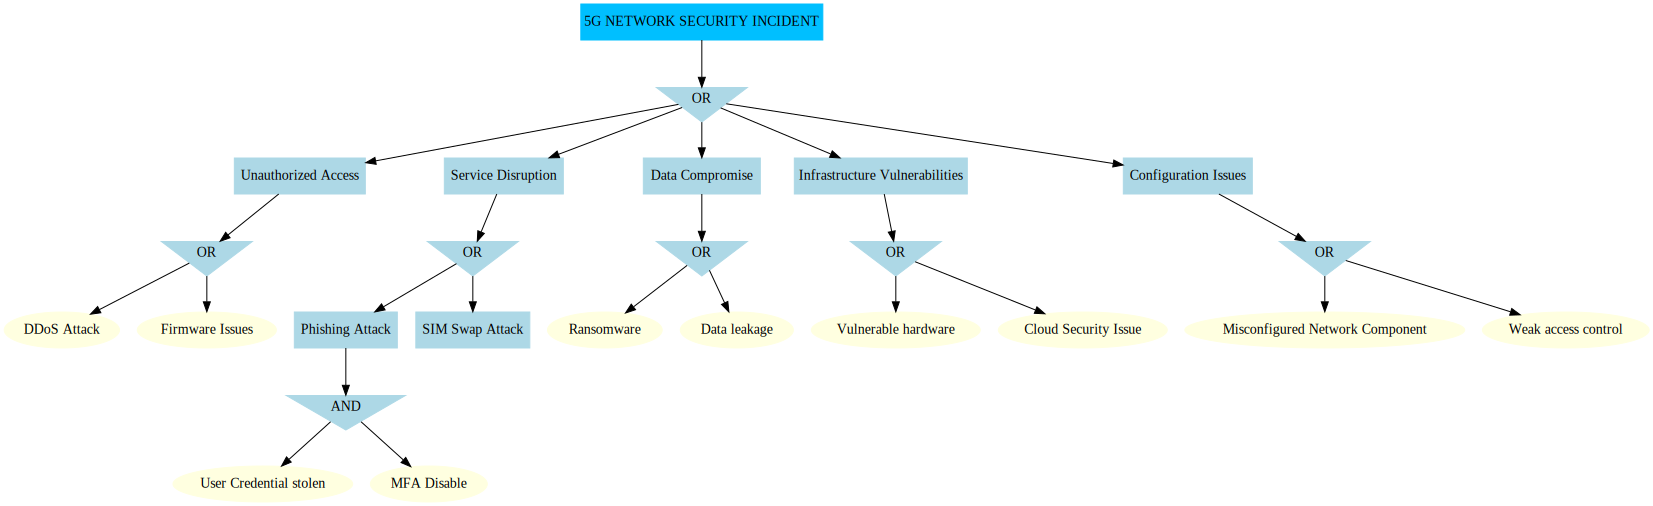

In [5]:
# Recursive function to build fault tree
def build_tree(graph, parent, tree):
    if isinstance(tree, dict):
        for gate, children in tree.items():
            gate_node = f"{parent}_{gate}"
            graph.node(gate_node, gate, shape='invtriangle', color='lightblue', style='filled')
            graph.edge(parent, gate_node)
            if isinstance(children, dict):
                for child, subchild in children.items():
                    graph.node(child, child, shape='box', color='lightblue', style='filled')
                    graph.edge(gate_node, child)
                    build_tree(graph, child, subchild)
            elif isinstance(children, list):
                for child in children:
                    graph.node(child, child, shape='ellipse', style='filled', color='lightyellow')
                    graph.edge(gate_node, child)

# Step 6: Create Graph and render
dot = Digraph(comment='5G Network Fault Tree')
root = list(fault_tree.keys())[0]
dot.node(root, root, shape='box', style='filled', color='deepskyblue')

build_tree(dot, root, fault_tree[root])
dot.render('5G_Fault_Tree', format='png', cleanup=False)
dot
